In [17]:
import requests
from datetime import datetime, timedelta

# Fonction pour convertir une date en timestamp UNIX
def date_to_unix(date_str):
    return int(datetime.strptime(date_str, '%Y-%m-%d').timestamp())

# Fonction pour récupérer les données d'arrivées et départs sur une période
def get_flights(airport, begin, end):
    # URL de l'API pour les arrivées et les départs
    arrivals_url = "https://opensky-network.org/api/flights/arrival"
    departures_url = "https://opensky-network.org/api/flights/departure"
    
    # Récupérer les arrivées
    arrivals_params = {'airport': airport, 'begin': begin, 'end': end}
    arrivals_response = requests.get(arrivals_url, params=arrivals_params)
    if arrivals_response.status_code == 200:
        arrivals = arrivals_response.json()
    else:
        print(f"Erreur lors de la récupération des arrivées : {arrivals_response.status_code}")
        arrivals = []
    
    # Récupérer les départs
    departures_params = {'airport': airport, 'begin': begin, 'end': end}
    departures_response = requests.get(departures_url, params=departures_params)
    if departures_response.status_code == 200:
        departures = departures_response.json()
    else:
        print(f"Erreur lors de la récupération des départs : {departures_response.status_code}")
        departures = []
    
    return arrivals, departures

# Tester avec une période courte (1 semaine par exemple)
start_date = datetime(2023, 1, 1)
end_date = datetime(2021, 1, 8)
begin = int(start_date.timestamp())
end = int(end_date.timestamp())
airport = 'KJFK'

# Récupérer les données pour une semaine
arrivals, departures = get_flights(airport, begin, end)

# Afficher les résultats
print(f"Arrivées sur une semaine : {len(arrivals)} vols récupérés")
print(f"Départs sur une semaine : {len(departures)} vols récupérés")


Arrivées sur une semaine : 1868 vols récupérés
Départs sur une semaine : 1761 vols récupérés


In [115]:
from datetime import datetime, timedelta
import requests
import pandas as pd

# Fonction pour convertir une date en timestamp UNIX à minuit UTC
def date_to_unix_midnight(date_str):
    return int(datetime.strptime(date_str, '%Y-%m-%d').replace(hour=0, minute=0, second=0).timestamp())

# Fonction pour récupérer les données d'arrivées et départs sur une période donnée
def get_flights(airport, begin, end):
    arrivals_url = "https://opensky-network.org/api/flights/arrival"
    departures_url = "https://opensky-network.org/api/flights/departure"
    
    # Récupérer les arrivées
    arrivals_params = {'airport': airport, 'begin': begin, 'end': end}
    arrivals_response = requests.get(arrivals_url, params=arrivals_params)
    if arrivals_response.status_code == 200:
        arrivals = arrivals_response.json()
    else:
        print(f"Erreur lors de la récupération des arrivées : {arrivals_response.status_code} - {arrivals_response.text}")
        arrivals = []
    
    # Récupérer les départs
    departures_params = {'airport': airport, 'begin': begin, 'end': end}
    departures_response = requests.get(departures_url, params=departures_params)
    if departures_response.status_code == 200:
        departures = departures_response.json()
    else:
        print(f"Erreur lors de la récupération des départs : {departures_response.status_code} - {departures_response.text}")
        departures = []
    
    return arrivals, departures

# Fonction pour récupérer les données pour une période de 30 jours en segments de 7 jours
def get_flights_for_30_days(airport, start_date, end_date):
    current_start = start_date
    all_arrivals = []
    all_departures = []

    while current_start < end_date:
        current_end = min(current_start + timedelta(days=7), end_date)  # Limiter à 7 jours max
        
        begin = int(current_start.timestamp())
        end = int(current_end.timestamp())
        
        print(f"Récupération des données du {current_start} au {current_end}")
        
        # Récupérer les données d'arrivées et départs pour la période
        arrivals, departures = get_flights(airport, begin, end)
        all_arrivals.extend(arrivals)
        all_departures.extend(departures)
        
        # Passer à la période suivante
        current_start = current_end

    return all_arrivals, all_departures

# Définir la période (1er janvier au 30 janvier 2023)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30)
airport = 'KJFK'

# Récupérer les données pour la période de 30 jours
arrivals, departures = get_flights_for_30_days(airport, start_date, end_date)

# Afficher les résultats
print(f"Arrivées : {len(arrivals)} vols récupérés")
print(f"Départs : {len(departures)} vols récupérés")

# Convertir en DataFrame et sauvegarder en CSV
arrivals_df = pd.DataFrame(arrivals)
departures_df = pd.DataFrame(departures)

arrivals_df.to_csv('arrivals_jan2023.csv', index=False)
departures_df.to_csv('departures_jan2023.csv', index=False)


Récupération des données du 2023-01-01 00:00:00 au 2023-01-08 00:00:00
Récupération des données du 2023-01-08 00:00:00 au 2023-01-15 00:00:00
Récupération des données du 2023-01-15 00:00:00 au 2023-01-22 00:00:00
Récupération des données du 2023-01-22 00:00:00 au 2023-01-29 00:00:00
Récupération des données du 2023-01-29 00:00:00 au 2023-01-30 00:00:00
Arrivées : 16614 vols récupérés
Départs : 15898 vols récupérés


In [18]:
from datetime import datetime, timedelta
import requests
import pandas as pd

# Fonction pour convertir une date en timestamp UNIX à minuit UTC
def date_to_unix_midnight(date_str):
    return int(datetime.strptime(date_str, '%Y-%m-%d').replace(hour=0, minute=0, second=0).timestamp())

# Fonction pour récupérer les données d'arrivées et départs sur une période donnée
def get_flights(airport, begin, end):
    arrivals_url = "https://opensky-network.org/api/flights/arrival"
    departures_url = "https://opensky-network.org/api/flights/departure"
    
    # Récupérer les arrivées
    arrivals_params = {'airport': airport, 'begin': begin, 'end': end}
    arrivals_response = requests.get(arrivals_url, params=arrivals_params)
    if arrivals_response.status_code == 200:
        arrivals = arrivals_response.json()
    else:
        print(f"Erreur lors de la récupération des arrivées : {arrivals_response.status_code}")
        arrivals = []
    
    # Récupérer les départs
    departures_params = {'airport': airport, 'begin': begin, 'end': end}
    departures_response = requests.get(departures_url, params=departures_params)
    if departures_response.status_code == 200:
        departures = departures_response.json()
    else:
        print(f"Erreur lors de la récupération des départs : {departures_response.status_code}")
        departures = []
    
    return arrivals, departures

# Fonction pour récupérer les données pour plusieurs périodes de 7 jours
def get_flights_for_6_months(airport, start_date, end_date):
    current_date = start_date
    all_arrivals = []
    all_departures = []

    while current_date < end_date:
        next_date = current_date + timedelta(days=7)  # Utiliser des périodes de 7 jours
        if next_date > end_date:
            next_date = end_date

        begin = int(current_date.timestamp())
        end = int(next_date.timestamp())

        print(f"Récupération des données du {current_date} au {next_date}")

        # Récupérer les données d'arrivées et départs pour la période
        arrivals, departures = get_flights(airport, begin, end)
        all_arrivals.extend(arrivals)
        all_departures.extend(departures)

        # Passer à la période suivante
        current_date = next_date

    return all_arrivals, all_departures

# Définir la période de 6 mois (1er janvier au 30 juin 2021)
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 6, 30)
airport = 'KJFK'

# Récupérer les données pour 6 mois
arrivals, departures = get_flights_for_6_months(airport, start_date, end_date)

# Afficher les résultats
print(f"Arrivées sur 6 mois : {len(arrivals)} vols récupérés")
print(f"Départs sur 6 mois : {len(departures)} vols récupérés")

# Convertir en DataFrame et sauvegarder en CSV
arrivals_df = pd.DataFrame(arrivals)
departures_df = pd.DataFrame(departures)

arrivals_df.to_csv('arrivals_6mois.csv', index=False)
departures_df.to_csv('departures_6mois.csv', index=False)


Récupération des données du 2021-01-01 00:00:00 au 2021-01-08 00:00:00
Récupération des données du 2021-01-08 00:00:00 au 2021-01-15 00:00:00
Récupération des données du 2021-01-15 00:00:00 au 2021-01-22 00:00:00
Récupération des données du 2021-01-22 00:00:00 au 2021-01-29 00:00:00
Récupération des données du 2021-01-29 00:00:00 au 2021-02-05 00:00:00
Récupération des données du 2021-02-05 00:00:00 au 2021-02-12 00:00:00
Récupération des données du 2021-02-12 00:00:00 au 2021-02-19 00:00:00
Récupération des données du 2021-02-19 00:00:00 au 2021-02-26 00:00:00
Récupération des données du 2021-02-26 00:00:00 au 2021-03-05 00:00:00
Récupération des données du 2021-03-05 00:00:00 au 2021-03-12 00:00:00
Récupération des données du 2021-03-12 00:00:00 au 2021-03-19 00:00:00
Récupération des données du 2021-03-19 00:00:00 au 2021-03-26 00:00:00
Erreur lors de la récupération des départs : 429
Récupération des données du 2021-03-26 00:00:00 au 2021-04-02 00:00:00
Erreur lors de la récupérati

In [116]:
# Lire les fichiers CSV
arrivals_df = pd.read_csv('arrivals_jan2023.csv')
departures_df = pd.read_csv('departures_jan2023.csv')

# Afficher un aperçu des données
print(arrivals_df.head())
print ()


   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  ac8217  1673138964                KSLC  1673153857              KJFK   
1  a7beea  1673136490                 NaN  1673153849              KJFK   
2  06a141  1673126602                EHBK  1673153695              KJFK   
3  ac89f7  1673141133                 NaN  1673153493              KJFK   
4  aca99c  1673136321                KSEA  1673153489              KJFK   

   callsign  estDepartureAirportHorizDistance  \
0  DAL380                              3259.0   
1  GLG7392                                NaN   
2  QTR8183                              742.0   
3  JBU1110                                NaN   
4  DAL374                               914.0   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                            281.0                            1105   
1                              NaN                            2869   
2                            121.0          

In [117]:
print(departures_df.head())



   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  aaaa92  1673153994                KJFK  1673189757              LLBG   
1  a4ce71  1673153643                KJFK  1673188364              LLBG   
2  adde95  1673153344                KJFK  1673171664              KSAN   
3  a721a4  1673152880                KJFK  1673159397               NaN   
4  06a1d3  1673152733                KJFK  1673194534              OMDW   

   callsign  estDepartureAirportHorizDistance  \
0  AAL146                                2427   
1  DAL234                                2264   
2  JBU89                                 2516   
3  JBU1359                               2226   
4  QQE942                                1734   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                               72                          4015.0   
1                              102                          3858.0   
2                               72          

In [118]:

# Statistiques descriptives
print(arrivals_df.describe())
print(departures_df.describe())

          firstSeen      lastSeen  estDepartureAirportHorizDistance  \
count  1.661400e+04  1.661400e+04                      13244.000000   
mean   1.673813e+09  1.673827e+09                       2463.479840   
std    7.286267e+05  7.283629e+05                       2420.910018   
min    1.672485e+09  1.672549e+09                         10.000000   
25%    1.673193e+09  1.673206e+09                       1005.000000   
50%    1.673787e+09  1.673803e+09                       1627.000000   
75%    1.674475e+09  1.674490e+09                       2883.250000   
max    1.675048e+09  1.675055e+09                      14974.000000   

       estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
count                     13244.000000                    16614.000000   
mean                        247.237768                     3196.338510   
std                         315.490625                     1323.467374   
min                           0.000000                      752.

In [119]:


# Obtenir la taille des données
arrivals_shape = arrivals_df.shape
departures_shape = departures_df.shape

print(f"Taille des données d'arrivées : {arrivals_shape}")
print(f"Taille des données de départs : {departures_shape}")

Taille des données d'arrivées : (16614, 12)
Taille des données de départs : (15898, 12)


In [98]:
# 1. Vérifier les valeurs manquantes
print("Valeurs manquantes dans les arrivées :")
print(arrivals_df.isnull().sum())
print("\nValeurs manquantes dans les départs :")
print(departures_df.isnull().sum())

# 2. Supprimer les lignes avec des valeurs manquantes (option)
arrivals_df_clean = arrivals_df.dropna()
departures_df_clean = departures_df.dropna()

# Afficher les DataFrames après suppression des valeurs manquantes
print("\nArrivées après suppression des valeurs manquantes :")
print(arrivals_df_clean)
print("\nDéparts après suppression des valeurs manquantes :")
print(departures_df_clean)

# 3. Supprimer les colonnes inutiles (tu peux ajuster en fonction de tes besoins)
arrivals_df_clean = arrivals_df_clean.drop(columns=['estDepartureAirportHorizDistance', 'estArrivalAirportHorizDistance'])
departures_df_clean = departures_df_clean.drop(columns=['estDepartureAirportHorizDistance', 'estArrivalAirportHorizDistance'])

# Afficher les DataFrames après suppression des colonnes inutiles
print("\nArrivées après suppression des colonnes inutiles :")
print(arrivals_df_clean)
print("\nDéparts après suppression des colonnes inutiles :")
print(departures_df_clean)

# 4. Extraire de nouvelles variables

# Durée du vol (en heures)
arrivals_df_clean['flight_duration_hours'] = (arrivals_df_clean['lastSeen'] - arrivals_df_clean['firstSeen']) / 3600
departures_df_clean['flight_duration_hours'] = (departures_df_clean['lastSeen'] - departures_df_clean['firstSeen']) / 3600

# Jour de la semaine
arrivals_df_clean['weekday'] = pd.to_datetime(arrivals_df_clean['firstSeen'], unit='s').dt.dayofweek
departures_df_clean['weekday'] = pd.to_datetime(departures_df_clean['firstSeen'], unit='s').dt.dayofweek

# Heure de la journée
arrivals_df_clean['hour_of_day'] = pd.to_datetime(arrivals_df_clean['firstSeen'], unit='s').dt.hour
departures_df_clean['hour_of_day'] = pd.to_datetime(departures_df_clean['firstSeen'], unit='s').dt.hour

# Afficher les DataFrames après extraction des nouvelles variables
print("\nArrivées après extraction des nouvelles variables :")
print(arrivals_df_clean.head())
print("\nDéparts après extraction des nouvelles variables :")
print(departures_df_clean.head())


Valeurs manquantes dans les arrivées :
icao24                                 0
firstSeen                              0
estDepartureAirport                 5728
lastSeen                               0
estArrivalAirport                      0
callsign                               9
estDepartureAirportHorizDistance    5728
estDepartureAirportVertDistance     5728
estArrivalAirportHorizDistance         0
estArrivalAirportVertDistance          0
departureAirportCandidatesCount        0
arrivalAirportCandidatesCount          0
dtype: int64

Valeurs manquantes dans les départs :
icao24                                 0
firstSeen                              0
estDepartureAirport                    0
lastSeen                               0
estArrivalAirport                   4683
callsign                               7
estDepartureAirportHorizDistance       0
estDepartureAirportVertDistance        0
estArrivalAirportHorizDistance      4683
estArrivalAirportVertDistance       4683
departu

In [142]:
import pandas as pd

# STEP 2 : Nettoyage des donnees

# Identification des valeurs manquantes
print("Valeurs manquantes dans les données d'arrivées :")
print(arrivals_df.isnull().sum())

print("\nValeurs manquantes dans les données de départs :")
print(departures_df.isnull().sum())

# 1. Suppression des lignes avec 'callsign' manquant
arrivals_df_clean = arrivals_df.dropna(subset=['callsign']).copy()
departures_df_clean = departures_df.dropna(subset=['callsign']).copy()

# 2. Remplir les colonnes 'estDepartureAirport' et 'estArrivalAirport' avec 'Unknown'
arrivals_df_clean.loc[:, 'estDepartureAirport'] = arrivals_df_clean['estDepartureAirport'].fillna('Unknown')
departures_df_clean.loc[:, 'estArrivalAirport'] = departures_df_clean['estArrivalAirport'].fillna('Unknown')

# 3. Imputation des distances manquantes avec la médiane
arrivals_df_clean.loc[:, 'estDepartureAirportHorizDistance'] = arrivals_df_clean['estDepartureAirportHorizDistance'].fillna(arrivals_df_clean['estDepartureAirportHorizDistance'].median())
arrivals_df_clean.loc[:, 'estDepartureAirportVertDistance'] = arrivals_df_clean['estDepartureAirportVertDistance'].fillna(arrivals_df_clean['estDepartureAirportVertDistance'].median())

departures_df_clean.loc[:, 'estArrivalAirportHorizDistance'] = departures_df_clean['estArrivalAirportHorizDistance'].fillna(departures_df_clean['estArrivalAirportHorizDistance'].median())
departures_df_clean.loc[:, 'estArrivalAirportVertDistance'] = departures_df_clean['estArrivalAirportVertDistance'].fillna(departures_df_clean['estArrivalAirportVertDistance'].median())

# 4. Vérification des valeurs manquantes après le nettoyage
print("\nValeurs manquantes restantes après nettoyage (arrivées) :")
print(arrivals_df_clean.isnull().sum())

print("\nValeurs manquantes restantes après nettoyage (départs) :")
print(departures_df_clean.isnull().sum())

# Sauvegarder les données nettoyées dans des fichiers CSV
arrivals_df_clean.to_csv('arrivals_jan2023_clean.csv', index=False)
departures_df_clean.to_csv('departures_jan2023_clean.csv', index=False)

print("\nDonnées nettoyées sauvegardées avec succès.")


Valeurs manquantes dans les données d'arrivées :
icao24                                 0
firstSeen                              0
estDepartureAirport                 3370
lastSeen                               0
estArrivalAirport                      0
callsign                               3
estDepartureAirportHorizDistance    3370
estDepartureAirportVertDistance     3370
estArrivalAirportHorizDistance         0
estArrivalAirportVertDistance          0
departureAirportCandidatesCount        0
arrivalAirportCandidatesCount          0
dtype: int64

Valeurs manquantes dans les données de départs :
icao24                                 0
firstSeen                              0
estDepartureAirport                    0
lastSeen                               0
estArrivalAirport                   2121
callsign                               3
estDepartureAirportHorizDistance       0
estDepartureAirportVertDistance        0
estArrivalAirportHorizDistance      2121
estArrivalAirportVertDistan

In [143]:

# Obtenir la taille des données
arrivals_shape = arrivals_df_clean.shape
departures_shape = departures_df_clean.shape

print(f"Taille des données d'arrivées : {arrivals_shape}")
print(f"Taille des données de départs : {departures_shape}")

Taille des données d'arrivées : (16611, 12)
Taille des données de départs : (15895, 12)


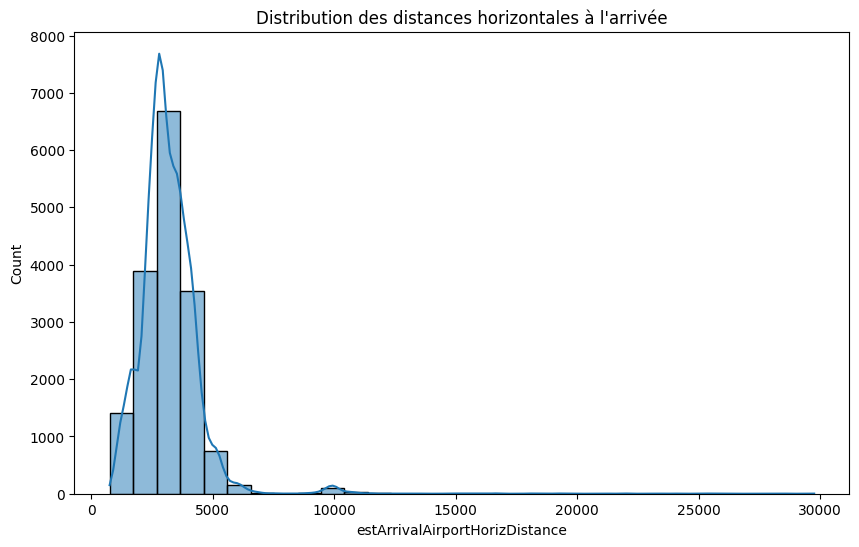

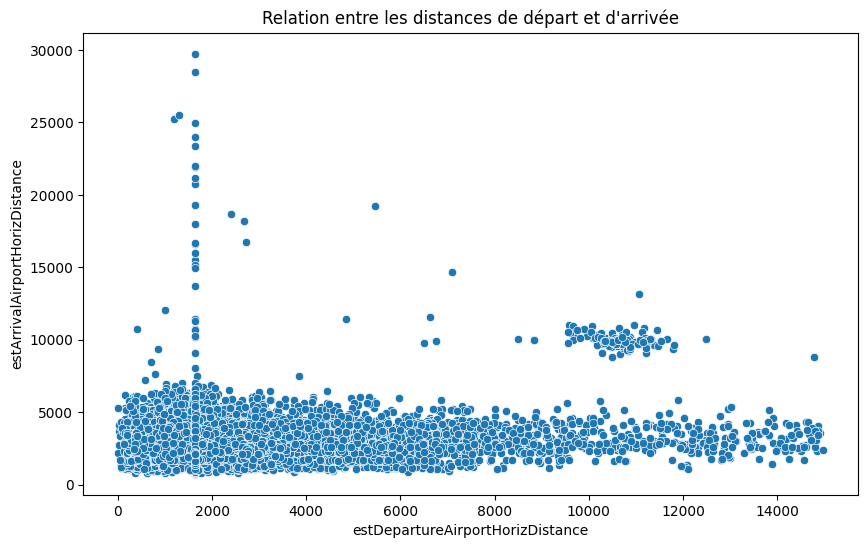

In [145]:
# STEP 3 Analyse exploratoire des données (EDA) :

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des distances à l'arrivée
plt.figure(figsize=(10,6))
sns.histplot(arrivals_df_clean['estArrivalAirportHorizDistance'], bins=30, kde=True)
plt.title('Distribution des distances horizontales à l\'arrivée')
plt.show()

# Scatter plot des distances de départ et d'arrivée
plt.figure(figsize=(10,6))
sns.scatterplot(x='estDepartureAirportHorizDistance', y='estArrivalAirportHorizDistance', data=arrivals_df_clean)
plt.title('Relation entre les distances de départ et d\'arrivée')
plt.show()


In [146]:
#2 Création des caractéristiques (feature engineering) 

# Calculer la durée de vol en secondes
arrivals_df_clean['flight_duration'] = arrivals_df_clean['lastSeen'] - arrivals_df_clean['firstSeen']
departures_df_clean['flight_duration'] = departures_df_clean['lastSeen'] - departures_df_clean['firstSeen']

# Conversion des timestamps en jours de la semaine
arrivals_df_clean['weekday'] = pd.to_datetime(arrivals_df_clean['firstSeen'], unit='s').dt.weekday
departures_df_clean['weekday'] = pd.to_datetime(departures_df_clean['firstSeen'], unit='s').dt.weekday


In [147]:
# Calculer la durée de vol en secondes
arrivals_df_clean['flight_duration'] = arrivals_df_clean['lastSeen'] - arrivals_df_clean['firstSeen']

# Définir un seuil pour considérer un vol comme retardé (par exemple, la médiane)
flight_duration_threshold = arrivals_df_clean['flight_duration'].median()

# Créer une colonne 'delayed' où True indique un retard (vol plus long que la médiane)
arrivals_df_clean['delayed'] = arrivals_df_clean['flight_duration'] > flight_duration_threshold

# Vérifier les nouvelles colonnes
print(arrivals_df_clean[['flight_duration', 'delayed']].head())


   flight_duration  delayed
0            14893     True
1            17359     True
2            27093     True
3            12360     True
4            17168     True


In [148]:
# Vérifier la distribution des classes dans la variable cible 'delayed'
print(arrivals_df_clean['delayed'].value_counts())


delayed
False    8306
True     8305
Name: count, dtype: int64


In [149]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 splits
scores = cross_val_score(model, X, y, cv=5)
print(f"Scores de validation croisée : {scores}")
print(f"Moyenne des scores de validation croisée : {scores.mean()}")


Scores de validation croisée : [1.         1.         1.         0.99954191 1.        ]
Moyenne des scores de validation croisée : 0.9999083829592305


In [150]:
# Importance des caractéristiques pour le modèle RandomForest
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names)
print(feature_importance.sort_values(ascending=False))


flight_duration                   0.989300
estArrivalAirportHorizDistance    0.009846
weekday                           0.000854
dtype: float64


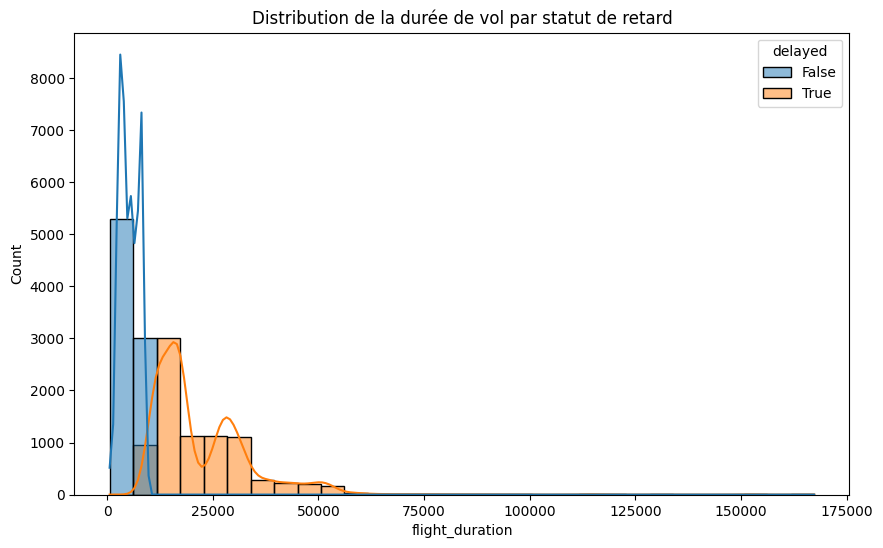

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la distribution de la durée de vol pour les vols retardés et non retardés
plt.figure(figsize=(10,6))
sns.histplot(data=arrivals_df_clean, x='flight_duration', hue='delayed', bins=30, kde=True)
plt.title("Distribution de la durée de vol par statut de retard")
plt.show()


In [152]:
# Créer une nouvelle caractéristique pour la différence entre les distances de départ et d'arrivée
arrivals_df_clean['distance_diff'] = arrivals_df_clean['estArrivalAirportHorizDistance'] - arrivals_df_clean['estDepartureAirportHorizDistance']

# Extraire l'heure du jour à partir du timestamp 'firstSeen'
arrivals_df_clean['hour_of_day'] = pd.to_datetime(arrivals_df_clean['firstSeen'], unit='s').dt.hour

# Créer une interaction entre 'hour_of_day' et 'weekday'
arrivals_df_clean['hour_weekday_interaction'] = arrivals_df_clean['hour_of_day'] * arrivals_df_clean['weekday']

# Vérifier les nouvelles colonnes
print(arrivals_df_clean[['distance_diff', 'hour_of_day', 'hour_weekday_interaction']].head())


   distance_diff  hour_of_day  hour_weekday_interaction
0        -2154.0            0                         0
1         1242.0            0                         0
2         1997.0           21                       105
3         2108.0            1                         6
4          407.0            0                         0


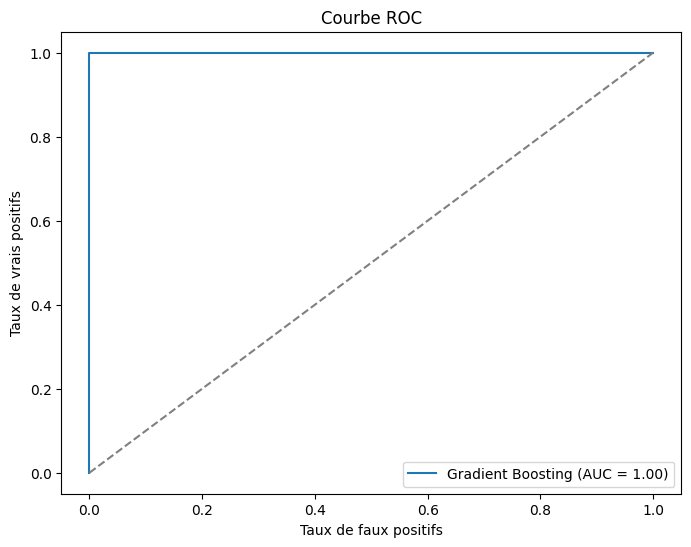

In [153]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prédire les probabilités
y_prob = gb_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Tracer la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()


In [154]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 splits pour Gradient Boosting
gb_scores = cross_val_score(gb_model, X, y, cv=5)
print(f"Scores de validation croisée pour Gradient Boosting : {gb_scores}")
print(f"Moyenne des scores : {gb_scores.mean()}")


Scores de validation croisée pour Gradient Boosting : [1. 1. 1. 1. 1.]
Moyenne des scores : 1.0


In [155]:
import pandas as pd

# Importance des caractéristiques dans le modèle Gradient Boosting
importances = gb_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)

# Afficher l'importance des caractéristiques triées par importance décroissante
print(feature_importance.sort_values(ascending=False))


flight_duration                   1.000000e+00
estArrivalAirportHorizDistance    6.230315e-14
weekday                           0.000000e+00
dtype: float64


In [56]:
import requests

# Clé API Visual Crossing
api_key = 'YVK2QU9RRBM9XT7G95GNMUNJV'

# Localisation
location = 'Paris,France'

# Période de 6 mois (du 1er janvier 2023 au 30 juin 2023)
start_date = '2023-01-01'
end_date = '2023-01-30'

# URL de l'API Visual Crossing pour une période de temps
url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start_date}/{end_date}?key={api_key}"

# Faire la requête pour récupérer les données météorologiques
response = requests.get(url)

# Vérification de la réponse
if response.status_code == 200:
    data = response.json()
    print("Données récupérées avec succès")
    
    # Tu peux maintenant analyser les données ou les sauvegarder
    # Par exemple, afficher les premières entrées
    for day in data['days']:
        print(f"Date: {day['datetime']}, Température max: {day['tempmax']}°C, Température min: {day['tempmin']}°C")
else:
    print(f"Erreur {response.status_code}: {response.text}")


Données récupérées avec succès
Date: 2023-01-01, Température max: 58.8°C, Température min: 52.5°C
Date: 2023-01-02, Température max: 57.6°C, Température min: 45.1°C
Date: 2023-01-03, Température max: 49.2°C, Température min: 42.0°C
Date: 2023-01-04, Température max: 56.3°C, Température min: 49.6°C
Date: 2023-01-05, Température max: 56.5°C, Température min: 52.4°C
Date: 2023-01-06, Température max: 55.7°C, Température min: 50.7°C
Date: 2023-01-07, Température max: 51.7°C, Température min: 45.7°C
Date: 2023-01-08, Température max: 51.7°C, Température min: 44.9°C
Date: 2023-01-09, Température max: 48.2°C, Température min: 42.3°C
Date: 2023-01-10, Température max: 52.8°C, Température min: 39.5°C
Date: 2023-01-11, Température max: 53.7°C, Température min: 49.0°C
Date: 2023-01-12, Température max: 53.0°C, Température min: 48.6°C
Date: 2023-01-13, Température max: 52.1°C, Température min: 45.6°C
Date: 2023-01-14, Température max: 54.1°C, Température min: 46.1°C
Date: 2023-01-15, Température m

In [135]:
import pandas as pd

# Convertir les données météorologiques en DataFrame pandas
weather_data = pd.DataFrame(data['days'])

# Sauvegarder les données dans un fichier CSV
weather_data.to_csv('weather_data_6mois.csv', index=False)
print("Données météo sauvegardées dans 'weather_data_6mois.csv'")




Données météo sauvegardées dans 'weather_data_6mois.csv'


In [136]:
print(weather_data.head()
)

     datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0  2023-01-01     1672527600     58.8     52.5  55.5          58.8   
1  2023-01-02     1672614000     57.6     45.1  51.3          57.6   
2  2023-01-03     1672700400     49.2     42.0  45.7          45.0   
3  2023-01-04     1672786800     56.3     49.6  53.1          56.3   
4  2023-01-05     1672873200     56.5     52.4  54.6          56.5   

   feelslikemin  feelslike   dew  humidity  ...  sunriseEpoch    sunset  \
0          52.5       55.5  47.2      74.5  ...    1672559053  17:04:11   
1          42.0       50.6  46.7      84.7  ...    1672645450  17:05:11   
2          38.7       41.6  43.6      92.4  ...    1672731845  17:06:13   
3          44.4       52.6  50.3      90.4  ...    1672818236  17:07:17   
4          52.4       54.6  50.1      84.9  ...    1672904624  17:08:24   

   sunsetEpoch moonphase              conditions  \
0   1672589051      0.31          Rain, Overcast   
1   1672675511      0.35

In [137]:
# Fonction de conversion Fahrenheit -> Celsius
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5.0/9.0

# Conversion des colonnes de températures en Celsius
weather_data['tempmax'] = weather_data['tempmax'].apply(fahrenheit_to_celsius)
weather_data['tempmin'] = weather_data['tempmin'].apply(fahrenheit_to_celsius)
weather_data['temp'] = weather_data['temp'].apply(fahrenheit_to_celsius)

# Vérifier les modifications
print(weather_data[['datetime', 'tempmax', 'tempmin', 'temp']].head())


     datetime    tempmax    tempmin       temp
0  2023-01-01  14.888889  11.388889  13.055556
1  2023-01-02  14.222222   7.277778  10.722222
2  2023-01-03   9.555556   5.555556   7.611111
3  2023-01-04  13.500000   9.777778  11.722222
4  2023-01-05  13.611111  11.333333  12.555556


In [138]:
# Sélectionner les colonnes pertinentes
columns_to_keep = ['datetime', 'tempmax', 'tempmin', 'humidity', 'conditions', 'description']
selected_weather_data = weather_data[columns_to_keep]

# Afficher les données sélectionnées
print(selected_weather_data.head())


# Sauvegarder les données sélectionnées dans un fichier CSV
selected_weather_data.to_csv('selected_weather_data.csv', index=False)
print("Données météo sélectionnées sauvegardées dans 'selected_weather_data.csv'")


     datetime    tempmax    tempmin  humidity              conditions  \
0  2023-01-01  14.888889  11.388889      74.5          Rain, Overcast   
1  2023-01-02  14.222222   7.277778      84.7  Rain, Partially cloudy   
2  2023-01-03   9.555556   5.555556      92.4  Rain, Partially cloudy   
3  2023-01-04  13.500000   9.777778      90.4          Rain, Overcast   
4  2023-01-05  13.611111  11.333333      84.9          Rain, Overcast   

                                         description  
0  Cloudy skies throughout the day with afternoon...  
1  Partly cloudy throughout the day with a chance...  
2        Partly cloudy throughout the day with rain.  
3         Cloudy skies throughout the day with rain.  
4         Cloudy skies throughout the day with rain.  
Données météo sélectionnées sauvegardées dans 'selected_weather_data.csv'


In [156]:
# Fusionner 

import pandas as pd

# Charger les données nettoyées des vols (arrivées et départs)
arrivals_df_clean = pd.read_csv('arrivals_jan2023_clean.csv')
departures_df_clean = pd.read_csv('departures_jan2023_clean.csv')

# Charger les données météo nettoyées
weather_data = pd.read_csv('selected_weather_data.csv')

# Associer la date d'arrivée ou de départ avec les données météo
# On utilise ici la colonne 'datetime' dans weather_data et 'lastSeen' dans arrivals_df_clean (ou 'firstSeen' pour les départs)

# Convertir les colonnes de dates au même format (si ce n'est pas déjà fait)
arrivals_df_clean['date'] = pd.to_datetime(arrivals_df_clean['lastSeen'], unit='s').dt.date
departures_df_clean['date'] = pd.to_datetime(departures_df_clean['firstSeen'], unit='s').dt.date
weather_data['datetime'] = pd.to_datetime(weather_data['datetime']).dt.date

# Fusionner les données météo avec les données d'arrivées et départs
arrivals_with_weather = pd.merge(arrivals_df_clean, weather_data, left_on='date', right_on='datetime', how='left')
departures_with_weather = pd.merge(departures_df_clean, weather_data, left_on='date', right_on='datetime', how='left')

# Afficher quelques résultats pour vérifier
print(arrivals_with_weather.head())
print(departures_with_weather.head())

# Sauvegarder les résultats dans des fichiers CSV
arrivals_with_weather.to_csv('arrivals_with_weather.csv', index=False)
departures_with_weather.to_csv('departures_with_weather.csv', index=False)

print("Données des vols avec météo associées sauvegardées.")


   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  ac8217  1673138964                KSLC  1673153857              KJFK   
1  a7beea  1673136490             Unknown  1673153849              KJFK   
2  06a141  1673126602                EHBK  1673153695              KJFK   
3  ac89f7  1673141133             Unknown  1673153493              KJFK   
4  aca99c  1673136321                KSEA  1673153489              KJFK   

   callsign  estDepartureAirportHorizDistance  \
0  DAL380                              3259.0   
1  GLG7392                             1627.0   
2  QTR8183                              742.0   
3  JBU1110                             1627.0   
4  DAL374                               914.0   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                            281.0                            1105   
1                            133.0                            2869   
2                            121.0          

In [157]:
import pandas as pd



# Obtenir la taille des données
arrivals_shape = arrivals_with_weather.shape
departures_shape = departures_with_weather.shape

print(f"Taille des données d'arrivées : {arrivals_shape}")
print(f"Taille des données de départs : {departures_shape}")


Taille des données d'arrivées : (16611, 19)
Taille des données de départs : (15895, 19)


In [158]:
import pandas as pd

# Charger les données des vols avec météo associée
arrivals_with_weather = pd.read_csv('arrivals_with_weather.csv')
departures_with_weather = pd.read_csv('departures_with_weather.csv')

# Remplir les valeurs manquantes avec une méthode d'interpolation ou des valeurs par défaut
arrivals_with_weather.fillna(method='ffill', inplace=True)  # Utiliser les valeurs précédentes
departures_with_weather.fillna(method='ffill', inplace=True)

# Supprimer les lignes avec trop de valeurs manquantes (si nécessaire)
# arrivals_with_weather.dropna(thresh=5, inplace=True)  # Ex: garder les lignes avec au moins 5 valeurs non-NaN
# departures_with_weather.dropna(thresh=5, inplace=True)

# Afficher un aperçu des résultats pour vérifier
print(arrivals_with_weather.head())
print(departures_with_weather.head())

# Sauvegarder les fichiers après gestion des valeurs manquantes
arrivals_with_weather.to_csv('arrivals_with_weather_cleaned.csv', index=False)
departures_with_weather.to_csv('departures_with_weather_cleaned.csv', index=False)

print("Données nettoyées des vols avec météo associées sauvegardées.")


C:\Users\olive\AppData\Local\Temp\ipykernel_17300\258920381.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  arrivals_with_weather.fillna(method='ffill', inplace=True)  # Utiliser les valeurs précédentes
C:\Users\olive\AppData\Local\Temp\ipykernel_17300\258920381.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  departures_with_weather.fillna(method='ffill', inplace=True)


   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  ac8217  1673138964                KSLC  1673153857              KJFK   
1  a7beea  1673136490             Unknown  1673153849              KJFK   
2  06a141  1673126602                EHBK  1673153695              KJFK   
3  ac89f7  1673141133             Unknown  1673153493              KJFK   
4  aca99c  1673136321                KSEA  1673153489              KJFK   

   callsign  estDepartureAirportHorizDistance  \
0  DAL380                              3259.0   
1  GLG7392                             1627.0   
2  QTR8183                              742.0   
3  JBU1110                             1627.0   
4  DAL374                               914.0   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                            281.0                            1105   
1                            133.0                            2869   
2                            121.0          

In [164]:

# Sauvegarder les fichiers après gestion des valeurs manquantes
arrivals_with_weathers = arrivals_with_weather.to_csv('arrivalswithweathercleaned.csv', index=False)
departures_with_weathers=departures_with_weather.to_csv('departureswithweathercleaned.csv', index=False)

print("Données nettoyées des vols avec météo associées sauvegardées.")

Données nettoyées des vols avec météo associées sauvegardées.


In [168]:
# Voir les informations des deux DataFrames
print("\nInformations sur les arrivées:")
print(arrivals_with_weather.info())



Informations sur les arrivées:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16611 entries, 0 to 16610
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   icao24                            16611 non-null  object 
 1   firstSeen                         16611 non-null  int64  
 2   estDepartureAirport               16611 non-null  object 
 3   lastSeen                          16611 non-null  int64  
 4   estArrivalAirport                 16611 non-null  object 
 5   callsign                          16611 non-null  object 
 6   estDepartureAirportHorizDistance  16611 non-null  float64
 7   estDepartureAirportVertDistance   16611 non-null  float64
 8   estArrivalAirportHorizDistance    16611 non-null  int64  
 9   estArrivalAirportVertDistance     16611 non-null  int64  
 10  departureAirportCandidatesCount   16611 non-null  int64  
 11  arrivalAirportCandidatesCount     1

In [169]:
print ()
print("\nInformations sur les départs:")
print(departures_with_weather.info())




Informations sur les départs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15895 entries, 0 to 15894
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   icao24                            15895 non-null  object 
 1   firstSeen                         15895 non-null  int64  
 2   estDepartureAirport               15895 non-null  object 
 3   lastSeen                          15895 non-null  int64  
 4   estArrivalAirport                 15895 non-null  object 
 5   callsign                          15895 non-null  object 
 6   estDepartureAirportHorizDistance  15895 non-null  int64  
 7   estDepartureAirportVertDistance   15895 non-null  int64  
 8   estArrivalAirportHorizDistance    15895 non-null  float64
 9   estArrivalAirportVertDistance     15895 non-null  float64
 10  departureAirportCandidatesCount   15895 non-null  int64  
 11  arrivalAirportCandidatesCount     1

In [162]:
print(departures_with_weather.head())

   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  aaaa92  1673153994                KJFK  1673189757              LLBG   
1  a4ce71  1673153643                KJFK  1673188364              LLBG   
2  adde95  1673153344                KJFK  1673171664              KSAN   
3  a721a4  1673152880                KJFK  1673159397           Unknown   
4  06a1d3  1673152733                KJFK  1673194534              OMDW   

   callsign  estDepartureAirportHorizDistance  \
0  AAL146                                2427   
1  DAL234                                2264   
2  JBU89                                 2516   
3  JBU1359                               2226   
4  QQE942                                1734   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                               72                          4015.0   
1                              102                          3858.0   
2                               72          

In [163]:
print(arrivals_with_weather.head())

   icao24   firstSeen estDepartureAirport    lastSeen estArrivalAirport  \
0  ac8217  1673138964                KSLC  1673153857              KJFK   
1  a7beea  1673136490             Unknown  1673153849              KJFK   
2  06a141  1673126602                EHBK  1673153695              KJFK   
3  ac89f7  1673141133             Unknown  1673153493              KJFK   
4  aca99c  1673136321                KSEA  1673153489              KJFK   

   callsign  estDepartureAirportHorizDistance  \
0  DAL380                              3259.0   
1  GLG7392                             1627.0   
2  QTR8183                              742.0   
3  JBU1110                             1627.0   
4  DAL374                               914.0   

   estDepartureAirportVertDistance  estArrivalAirportHorizDistance  \
0                            281.0                            1105   
1                            133.0                            2869   
2                            121.0          

In [170]:
# Fusionner les deux DataFrames sur une colonne commune (ex: 'icao24' si c'est l'ID commun)
merged_data = pd.merge(arrivals_with_weather, departures_with_weather, on='icao24', suffixes=('_arrival', '_departure'))

# Vérifier le résultat
print("\nDonnées fusionnées:")
print(merged_data.head())



Données fusionnées:
   icao24  firstSeen_arrival estDepartureAirport_arrival  lastSeen_arrival  \
0  ac8217         1673138964                        KSLC        1673153857   
1  ac8217         1673138964                        KSLC        1673153857   
2  ac8217         1673138964                        KSLC        1673153857   
3  ac8217         1673138964                        KSLC        1673153857   
4  ac8217         1673138964                        KSLC        1673153857   

  estArrivalAirport_arrival callsign_arrival  \
0                      KJFK         DAL380     
1                      KJFK         DAL380     
2                      KJFK         DAL380     
3                      KJFK         DAL380     
4                      KJFK         DAL380     

   estDepartureAirportHorizDistance_arrival  \
0                                    3259.0   
1                                    3259.0   
2                                    3259.0   
3                                

In [180]:
print(merged_data.columns)

Index(['icao24', 'firstSeen_arrival', 'estDepartureAirport_arrival',
       'lastSeen_arrival', 'estArrivalAirport_arrival', 'callsign_arrival',
       'estDepartureAirportHorizDistance_arrival',
       'estDepartureAirportVertDistance_arrival',
       'estArrivalAirportHorizDistance_arrival',
       'estArrivalAirportVertDistance_arrival',
       'departureAirportCandidatesCount_arrival',
       'arrivalAirportCandidatesCount_arrival', 'date_arrival',
       'datetime_arrival', 'tempmax_arrival', 'tempmin_arrival',
       'humidity_arrival', 'conditions_arrival', 'description_arrival',
       'firstSeen_departure', 'estDepartureAirport_departure',
       'lastSeen_departure', 'estArrivalAirport_departure',
       'callsign_departure', 'estDepartureAirportHorizDistance_departure',
       'estDepartureAirportVertDistance_departure',
       'estArrivalAirportHorizDistance_departure',
       'estArrivalAirportVertDistance_departure',
       'departureAirportCandidatesCount_departure',
   

In [171]:

# Sauvegarder le fichier fusionné si tu as fusionné les données
merged_data.to_csv('merged_flight_data.csv', index=False)

In [172]:
# Vérifier les doublons
duplicates = merged_data.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")

# Supprimer les doublons si nécessaire
merged_data_clean = merged_data.drop_duplicates()


Nombre de doublons : 7945


In [175]:


# # Créer une colonne de retard pour les départs. Utilisation de .loc pour modifier directement le DataFrame 
merged_data_clean.loc[:, 'retard_depart'] = merged_data_clean['firstSeen_departure'] - merged_data_clean['firstSeen_arrival']
# Créer une colonne de retard pour les arrivées
merged_data_clean.loc[:, 'retard_arrivee'] = merged_data_clean['lastSeen_arrival'] - merged_data_clean['lastSeen_departure']

# Remplacer les valeurs manquantes par 0
merged_data_clean = merged_data_clean.fillna(0)



In [176]:
# Définir un critère pour indiquer si un vol est retardé
merged_data_clean['status_retard'] = merged_data_clean.apply(
    lambda row: 'Retardé' if row['retard_depart'] > 15 or row['retard_arrivee'] > 15 else 'À l\'heure', axis=1
)

# Vérifier les résultats
print(merged_data_clean[['retard_depart', 'retard_arrivee', 'status_retard']].head())


   retard_depart  retard_arrivee status_retard
0         -90446           86650       Retardé
1        -128438          130938       Retardé
2        -196044          199052       Retardé
3        -352544          349452       Retardé
4        -543767          539376       Retardé


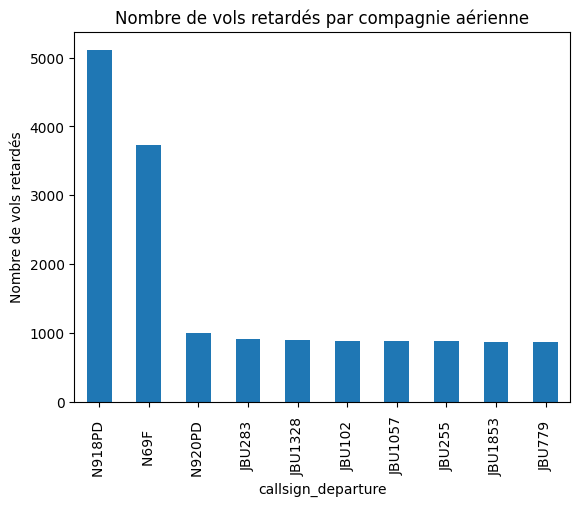

In [177]:
import matplotlib.pyplot as plt

# Nombre de vols retardés par compagnie
delays_by_airline = merged_data_clean.groupby('callsign_departure')['status_retard'].apply(lambda x: (x == 'Retardé').sum())
delays_by_airline.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Nombre de vols retardés par compagnie aérienne')
plt.ylabel('Nombre de vols retardés')
plt.show()


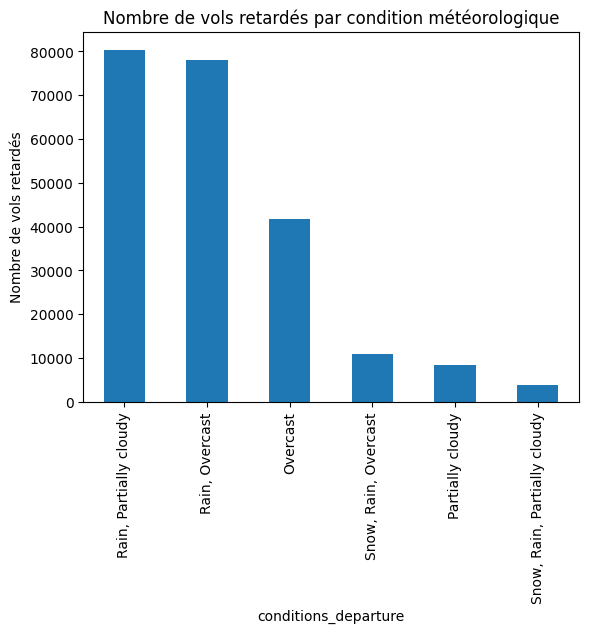

In [178]:
# Nombre de vols retardés selon les conditions météorologiques
delays_by_weather = merged_data_clean.groupby('conditions_departure')['status_retard'].apply(lambda x: (x == 'Retardé').sum())
delays_by_weather.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Nombre de vols retardés par condition météorologique')
plt.ylabel('Nombre de vols retardés')
plt.show()


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Sélection des caractéristiques
features = ['tempmax_departure', 'tempmin_departure', 'humidity_departure', 'estDepartureAirportHorizDistance_departure', 'estArrivalAirportHorizDistance_departure']
X = merged_data_clean[features]
y = merged_data_clean['status_retard'].apply(lambda x: 1 if x == 'Retardé' else 0)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modélisation avec un RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Précision et matrice de confusion
print(f"Précision du modèle : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}")


Précision du modèle : 99.88%
Matrice de confusion : 
[[    0    80]
 [    1 66934]]


In [187]:
import pandas as pd

# Charger les données
merged_data = pd.read_csv('merged_flight_data.csv')

# Calcul de la durée du vol en secondes
merged_data['flight_duration'] = merged_data['lastSeen_arrival'] - merged_data['firstSeen_arrival']

# Remplacer les valeurs manquantes par 0 pour la durée
merged_data.loc[:, 'flight_duration'] = merged_data['flight_duration'].fillna(0)

# Conversion du timestamp en jour de la semaine
merged_data['weekday'] = pd.to_datetime(merged_data['firstSeen_arrival'], unit='s').dt.weekday

# Définir un seuil pour le retard (ex: la médiane)
flight_duration_threshold = merged_data['flight_duration'].median()

# Créer une colonne "retardé" si la durée dépasse le seuil
merged_data['delayed'] = merged_data['flight_duration'] > flight_duration_threshold

# Ajout des caractéristiques météo pertinentes pour la prédiction
features = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival', 'conditions_arrival',
            'tempmax_departure', 'tempmin_departure', 'humidity_departure', 'conditions_departure',
            'flight_duration', 'weekday']

# Préparation des données pour la modélisation
X = merged_data[features]
y = merged_data['delayed']  # Cible : si le vol est retardé

# Afficher les premières lignes des données traitées
print(merged_data[['flight_duration', 'delayed', 'tempmax_arrival', 'tempmin_arrival', 'humidity_arrival']].head())






   flight_duration  delayed  tempmax_arrival  tempmin_arrival  \
0            14893     True        10.944444         7.166667   
1            14893     True        10.944444         7.166667   
2            14893     True        10.944444         7.166667   
3            14893     True        10.944444         7.166667   
4            14893     True        10.944444         7.166667   

   humidity_arrival  
0              83.1  
1              83.1  
2              83.1  
3              83.1  
4              83.1  


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Caractéristiques pour l'entraînement
features = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival',
            'tempmax_departure', 'tempmin_departure', 'humidity_departure',
            'flight_duration', 'weekday']

X = merged_data[features]  # Les caractéristiques
y = merged_data['delayed']  # La cible (True si retardé, False sinon)

# Séparation des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Précision du modèle : 97.45%
Matrice de confusion :
[[22397   624]
 [  558 22687]]


c:\Users\olive\Final-Projet\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Caractéristiques pour l'entraînement
features = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival',
            'tempmax_departure', 'tempmin_departure', 'humidity_departure',
            'flight_duration', 'weekday']

X = merged_data[features]  # Les caractéristiques
y = merged_data['delayed']  # La cible (True si retardé, False sinon)

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique avec plus d'itérations
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Précision du modèle : 99.87%
Matrice de confusion :
[[22985    36]
 [   22 23223]]


Précision du modèle : 99.87%
Matrice de confusion :
[[22985    36]
 [   22 23223]]


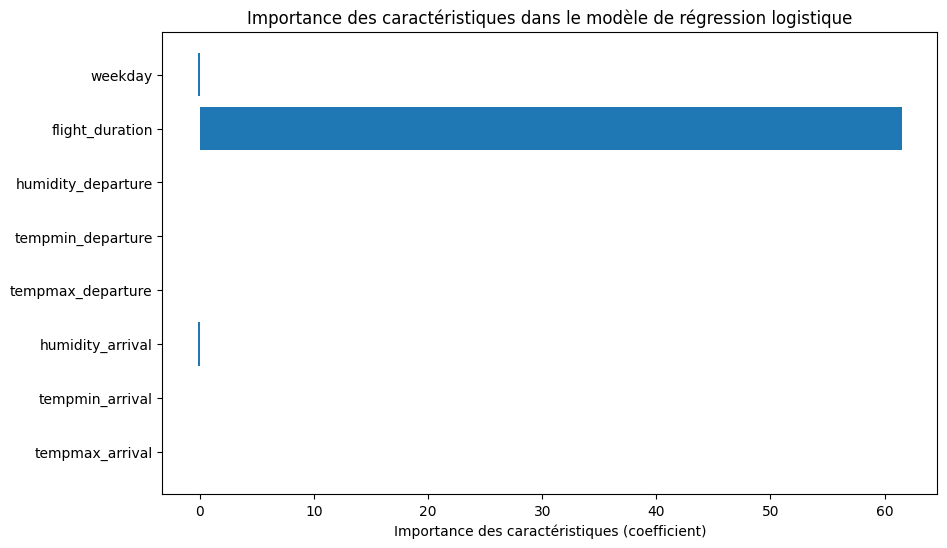

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Caractéristiques pour l'entraînement
features = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival',
            'tempmax_departure', 'tempmin_departure', 'humidity_departure',
            'flight_duration', 'weekday']

X = merged_data[features]  # Les caractéristiques
y = merged_data['delayed']  # La cible (True si retardé, False sinon)

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique avec plus d'itérations
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)

# Importance des caractéristiques (les coefficients du modèle)
importance = model.coef_[0]

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance des caractéristiques (coefficient)')
plt.title("Importance des caractéristiques dans le modèle de régression logistique")
plt.show()


In [199]:
# GRADIENT BOOSTING 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caractéristiques pour l'entraînement
features = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival',
            'tempmax_departure', 'tempmin_departure', 'humidity_departure',
            'flight_duration', 'weekday']

X = merged_data[features]  # Les caractéristiques
y = merged_data['delayed']  # La cible (True si retardé, False sinon)

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = gb_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Précision du modèle : 100.00%
Matrice de confusion :
[[23021     0]
 [    0 23245]]


In [200]:
#AMELIORATION DU GRADIENT BOOSTING

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Instancier le modèle Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Effectuer une validation croisée avec 5 folds
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)

# Afficher les résultats
print(f"Scores de la validation croisée : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}")


Scores de la validation croisée : [1. 1. 1. 1. 1.]
Score moyen : 1.00


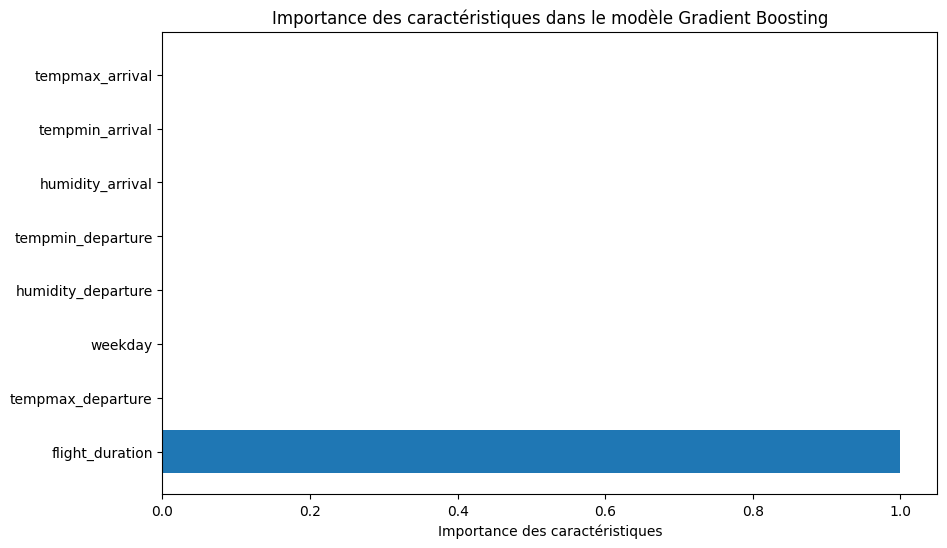

In [201]:
# Entraîner à nouveau le modèle sur l'ensemble des données
gb_model.fit(X_train, y_train)

# Obtenir les importances des caractéristiques
importances = gb_model.feature_importances_

# Afficher les importances avec les noms des caractéristiques
feature_names = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival',
                 'tempmax_departure', 'tempmin_departure', 'humidity_departure',
                 'flight_duration', 'weekday']

import matplotlib.pyplot as plt
import numpy as np

# Tracer les importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importance des caractéristiques dans le modèle Gradient Boosting")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance des caractéristiques')
plt.show()


In [203]:
# ADD NOISE FOR GRADIENT BOOSTING

import numpy as np
# Ajouter du bruit uniquement à l'ensemble d'entraînement
noise = np.random.normal(0, 0.1, X_train.shape)
X_train_noisy = X_train + noise

# Réentraîner le modèle avec les données bruitées
gb_model.fit(X_train_noisy, y_train)


# Prédictions et évaluation
y_pred_noisy = gb_model.predict(X_test)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)

print(f"Précision du modèle avec bruit ajouté : {accuracy_noisy * 100:.2f}%")


Précision du modèle avec bruit ajouté : 98.05%


In [204]:
 # REGLAGE DES HYPERPARAMETRES Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Définir l'espace de recherche pour les hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle Gradient Boosting
gb_model = GradientBoostingClassifier()

# Utiliser RandomizedSearchCV pour rechercher les meilleurs hyperparamètres
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Ajuster le modèle avec RandomizedSearchCV
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés : ", random_search.best_params_)

# Prédictions sur l'ensemble de test
y_pred = random_search.best_estimator_.predict(X_test)

# Évaluer le modèle optimisé
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle après optimisation : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Meilleurs hyperparamètres trouvés :  {'subsample': 0.6, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}
Précision du modèle après optimisation : 100.00%
Matrice de confusion :
[[23021     0]
 [    0 23245]]


In [206]:
from sklearn.model_selection import cross_val_score

# Reprend les caractéristiques et la cible
X = merged_data[features]
y = merged_data['delayed']

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modèle optimisé (vous pouvez utiliser les meilleurs hyperparamètres déjà trouvés)
best_gb_model = GradientBoostingClassifier(subsample=0.6, n_estimators=400, 
                                           min_samples_split=10, min_samples_leaf=4, 
                                           max_depth=4, learning_rate=0.1)

# Validation croisée sur 5 folds (par exemple)
cv_scores = cross_val_score(best_gb_model, X_scaled, y, cv=5)

# Afficher les résultats
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())


Scores de validation croisée : [1. 1. 1. 1. 1.]
Précision moyenne : 1.0


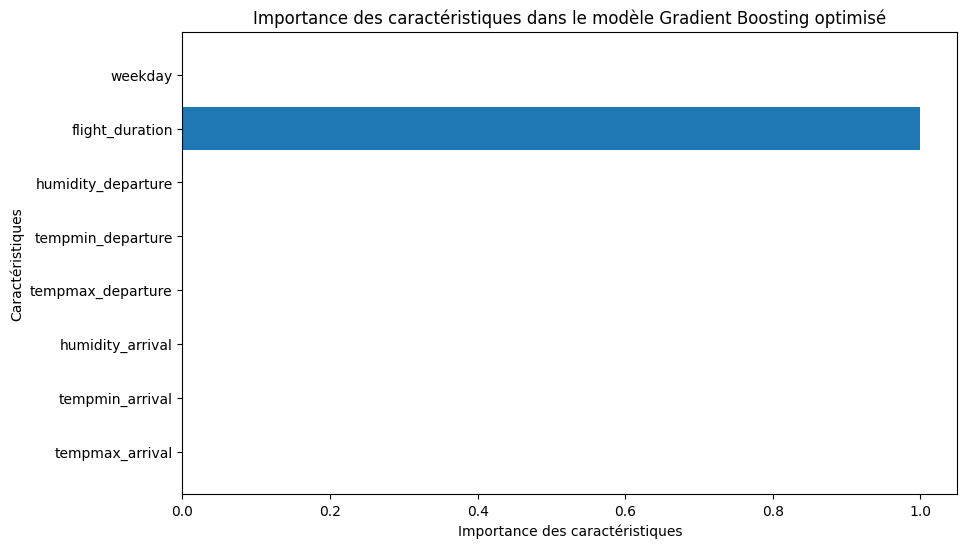

In [205]:
import matplotlib.pyplot as plt

# Extraire l'importance des caractéristiques
feature_importances = random_search.best_estimator_.feature_importances_

# Les noms des caractéristiques
feature_names = ['tempmax_arrival', 'tempmin_arrival', 'humidity_arrival', 
                 'tempmax_departure', 'tempmin_departure', 'humidity_departure',
                 'flight_duration', 'weekday']

# Créer un graphique des importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance des caractéristiques')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques dans le modèle Gradient Boosting optimisé')
plt.show()


In [208]:
# RANDOM FOREST CLASSIFIER

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Créer une copie des données d'origine pour éviter de modifier l'original
merged_data_copy = merged_data.copy()

# Liste des colonnes catégorielles (identifiants d'aéroports, conditions météorologiques, etc.)
categorical_columns = ['icao24', 'estDepartureAirport_arrival', 'estArrivalAirport_arrival', 
                       'callsign_arrival', 'estDepartureAirport_departure', 
                       'estArrivalAirport_departure', 'callsign_departure', 
                       'conditions_arrival', 'conditions_departure']

# Encoder les colonnes catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_data_copy[col] = label_encoder.fit_transform(merged_data_copy[col].astype(str))

# Supprimer les colonnes non pertinentes (par exemple, les colonnes de dates ou de description)
merged_data_copy = merged_data_copy.drop(columns=['datetime_arrival', 'datetime_departure', 'date_arrival', 'date_departure', 'description_arrival', 'description_departure'])

# Séparer les caractéristiques (X) et la cible (y)
X = merged_data_copy.drop(columns=['delayed'])  # 'delayed' est la colonne cible
y = merged_data_copy['delayed']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Précision du modèle : 100.00%
Matrice de confusion :
[[34602     0]
 [    0 34797]]


In [209]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     34602
        True       1.00      1.00      1.00     34797

    accuracy                           1.00     69399
   macro avg       1.00      1.00      1.00     69399
weighted avg       1.00      1.00      1.00     69399



In [210]:

#  CROSS VALIDATION FOR RANDOM FOREST

from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Scores de validation croisée : {cross_val_scores}")
print(f"Précision moyenne : {cross_val_scores.mean() * 100:.2f}%")


Scores de validation croisée : [0.99997839 0.9851727  1.         1.         1.        ]
Précision moyenne : 99.70%


In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Créer une copie des données d'origine pour éviter de modifier l'original
merged_data_copy = merged_data.copy()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['icao24', 'estDepartureAirport_arrival', 'estArrivalAirport_arrival', 
                       'callsign_arrival', 'estDepartureAirport_departure', 
                       'estArrivalAirport_departure', 'callsign_departure', 
                       'conditions_arrival', 'conditions_departure']

# Encoder les colonnes catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_data_copy[col] = label_encoder.fit_transform(merged_data_copy[col].astype(str))

# Supprimer les colonnes textuelles ou non pertinentes
merged_data_copy = merged_data_copy.drop(columns=['description_arrival', 'description_departure', 'datetime_arrival', 'datetime_departure', 'date_arrival', 'date_departure'])

# Séparer les caractéristiques (X) et la cible (y)
X = merged_data_copy.drop(columns=['delayed'])  # 'delayed' est la colonne cible
y = merged_data_copy['delayed']

# Normalisation des données (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner le modèle SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Tu peux essayer différents noyaux (rbf, linear, poly)
svm_model.fit(X_train, y_train)

# Prédictions
y_pred = svm_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle SVM : {accuracy * 100:.2f}%")
print("Matrice de confusion :")
print(conf_matrix)


Précision du modèle SVM : 98.64%
Matrice de confusion :
[[34193   409]
 [  534 34263]]


In [213]:
from sklearn.model_selection import GridSearchCV

# Définir une grille d'hyperparamètres pour SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Créer un modèle SVM de base
svm_model = SVC()

# Effectuer une recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Prédictions avec le modèle optimisé
y_pred_optimized = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle optimisé
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

print(f"Précision du modèle SVM après optimisation : {accuracy_optimized * 100:.2f}%")
print("Matrice de confusion optimisée :")
print(conf_matrix_optimized)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
